# Titanic Analyze data

### Collect data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('data/train.csv')

In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

### Analyze data

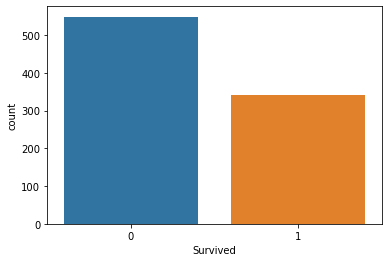

In [5]:
sns.countplot(x='Survived', data = data);

In [ ]:
sns.countplot(x='Survived', hue='Sex', data = data);

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=data);

In [ ]:
data['Age'].plot.hist();

In [ ]:
data['Fare'].plot.hist(bins=20, figsize=(10, 5));

In [ ]:
data.info()

In [ ]:
sns.countplot(x='SibSp', data=data);

### Data Wrangling

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False);

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=data);

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data.dropna(inplace=True)
# Xóa những dòng có giá trị null-------DÒNG

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False);

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
891-712

In [9]:
dataset = dataset.rename(columns=lambda x: x.strip().lower())
dataset.head()

dataset = dataset[['pclass', 'sex', 'age', 'sibsp',
                   'parch', 'fare', 'embarked', 'survived']]
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})
dataset['age'] = pd.to_numeric(dataset['age'], errors='coerce')
dataset['age'] = dataset['age'].fillna(np.mean(dataset['age']))

embarked_dummies = pd.get_dummies(dataset['embarked'])
dataset = pd.concat([dataset, embarked_dummies], axis=1)
dataset = dataset.drop(['embarked'], axis=1)

In [10]:
dataset.head()

,pclass,sex,age,sibsp,parch,fare,survived,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [ ]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)
embarked

In [ ]:
Pclass = pd.get_dummies(data['Pclass'], drop_first=True)
Pclass

In [ ]:
data = pd.concat([data, sex, embarked, Pclass], axis=1)
data.head(5)

In [ ]:
data = data.drop(['Sex', 'Name', 'Embarked', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
data.drop(columns=['Pclass'])
data.head()

In [ ]:
data.drop(['Pclass'], axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data.drop(['2', '3'], axis=1, inplace=True)

### Train Data

In [12]:
X = dataset.drop('survived', axis=1)
y = dataset['survived']

In [13]:
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [17]:
model = LogisticRegression()

In [26]:
model.fit(X_scaled, y)

LogisticRegression()

In [21]:
from sklearn.metrics import classification_report

In [27]:
prediction = model.predict(X_test)

In [22]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.78      0.84      0.81       153\n           1       0.76      0.68      0.72       115\n\n    accuracy                           0.77       268\n   macro avg       0.77      0.76      0.76       268\nweighted avg       0.77      0.77      0.77       268\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, prediction)

In [24]:
from sklearn.metrics import accuracy_score


In [28]:
accuracy_score(y_test, prediction)

0.6194029850746269

In [29]:
import pickle

In [30]:
pickle.dump(model, open("model.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))